In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import osmnx as ox


plt.style.use('ggplot')

In [2]:
df = pd.read_csv("London_crime_data_2020.csv")

# DATA EXPLORATION

In [3]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [4]:
df.shape

# Dataset has 90979 entries and 12 features

(90979, 12)

In [5]:
df.describe()

,Longitude,Latitude,Context
count,90435.000000,90435.000000,0.0
mean,-0.121390,51.511320,NaN
std,0.155808,0.081744,NaN
min,-5.545210,50.100792,NaN
25%,-0.200683,51.470369,NaN
50%,-0.117239,51.514983,NaN
75%,-0.033239,51.553906,NaN
max,1.733734,55.020499,NaN


## DROPPING UNNECESSARY COLUMNS

In [6]:
# Dropping Crime Id, Context column,Reported by and Falls within, LSOA code as its not adding any value to dataset

df = df.drop(["Crime ID", "Context","Falls within","Reported by","LSOA code"], axis = 1)

In [7]:
df.head()

,Month,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,2020-01,-0.539301,50.817200,On or near Highdown Drive,Arun 009F,Other theft,Status update unavailable
1,2020-01,0.137065,51.583672,On or near Police Station,Barking and Dagenham 001A,Anti-social behaviour,NaN
2,2020-01,0.140035,51.589112,On or near Beansland Grove,Barking and Dagenham 001A,Anti-social behaviour,NaN
3,2020-01,0.137065,51.583672,On or near Police Station,Barking and Dagenham 001A,Anti-social behaviour,NaN
4,2020-01,0.141143,51.590873,On or near Furze Farm Close,Barking and Dagenham 001A,Anti-social behaviour,NaN


# DATA SUMMARY

In [8]:
# Identifying nulls, duplicates, count and unique values

In [9]:
datadict = pd.DataFrame(df.dtypes)
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = df.isnull().sum()

# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=df.nunique()

# Count of values
datadict['Count']=df.count()

#Identify number of duplicates
datadict["Duplicates"] = df.duplicated()

datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count,Duplicates
Month,object,0,1,90979,NaN
Longitude,float64,544,32150,90435,NaN
Latitude,float64,544,31157,90435,NaN
Location,object,0,21659,90979,NaN
LSOA name,object,544,5030,90435,NaN
Crime type,object,0,14,90979,NaN
Last outcome category,object,17548,9,73431,NaN


In [10]:
#  Percentage of null values 
    
Percent = round(df.isnull().sum()*100/len(df), 2)
Percent

# Latitude and Longtitue have less than 1% null values which can be dropped

Month                     0.00
Longitude                 0.60
Latitude                  0.60
Location                  0.00
LSOA name                 0.60
Crime type                0.00
Last outcome category    19.29
dtype: float64

In [11]:
df.dropna(subset =["Longitude", "Latitude"],inplace = True)

In [12]:
# Imputing data with mode for Outcome column as there are 19% null values

df['Last outcome category'].fillna(df["Last outcome category"].mode()[0], inplace=True)

In [13]:
Percent = round(df.isnull().sum()*100/len(df), 2)
Percent

Month                    0.0
Longitude                0.0
Latitude                 0.0
Location                 0.0
LSOA name                0.0
Crime type               0.0
Last outcome category    0.0
dtype: float64

In [14]:
df.head()

,Month,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,2020-01,-0.539301,50.817200,On or near Highdown Drive,Arun 009F,Other theft,Status update unavailable
1,2020-01,0.137065,51.583672,On or near Police Station,Barking and Dagenham 001A,Anti-social behaviour,Status update unavailable
2,2020-01,0.140035,51.589112,On or near Beansland Grove,Barking and Dagenham 001A,Anti-social behaviour,Status update unavailable
3,2020-01,0.137065,51.583672,On or near Police Station,Barking and Dagenham 001A,Anti-social behaviour,Status update unavailable
4,2020-01,0.141143,51.590873,On or near Furze Farm Close,Barking and Dagenham 001A,Anti-social behaviour,Status update unavailable


In [15]:
# REASSIGNING DATA TYPE

df['Month']= pd.to_datetime(df["Month"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90435 entries, 0 to 90434
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Month                  90435 non-null  datetime64[ns]
 1   Longitude              90435 non-null  float64       
 2   Latitude               90435 non-null  float64       
 3   Location               90435 non-null  object        
 4   LSOA name              90435 non-null  object        
 5   Crime type             90435 non-null  object        
 6   Last outcome category  90435 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 5.5+ MB


## RENAMING COLUMNS

In [17]:
df = df.rename(columns = {"Month":"Date", "LSOA name": "LSOA_name","Crime type":"Crime_type","Last outcome category":"Last_outcome_category"})

## FEATURE ENGINEERING

In [18]:
df["month"] = df["Date"].dt.month
df["year"]=df["Date"].dt.year

# Creating month and year column

## Dropping Date column

In [19]:
df.drop("Date", axis = 1, inplace = True)

In [20]:
# CLEANING DATA TO REMOVE LAGGING AND LEADING CHARACTERS

In [21]:
# Removing the area code off the name, just to clean this column up a little bit more
df['LSOA_name'] = df['LSOA_name'].str[:-5]

In [22]:
# Removing the on or near from Location to clean up the column
df['Location'] = df['Location'].str[11:]

# FEATURE EXPLORATION

In [23]:
df.head()

,Longitude,Latitude,Location,LSOA_name,Crime_type,Last_outcome_category,month,year
0,-0.539301,50.817200,Highdown Drive,Arun,Other theft,Status update unavailable,1,2020
1,0.137065,51.583672,Police Station,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020
2,0.140035,51.589112,Beansland Grove,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020
3,0.137065,51.583672,Police Station,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020
4,0.141143,51.590873,Furze Farm Close,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020


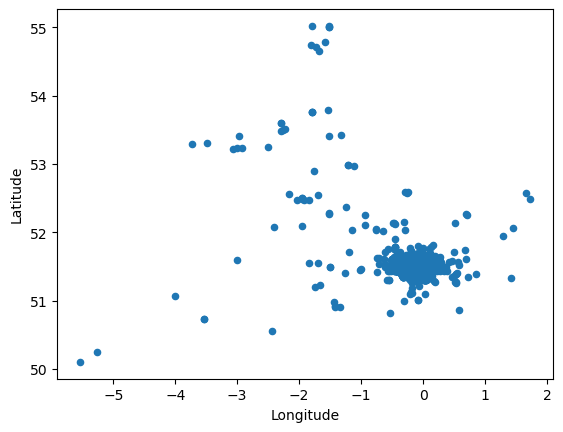

In [24]:
df.plot(x="Longitude", y="Latitude", kind="scatter")
plt.show()


In [25]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_11216/1771207407.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


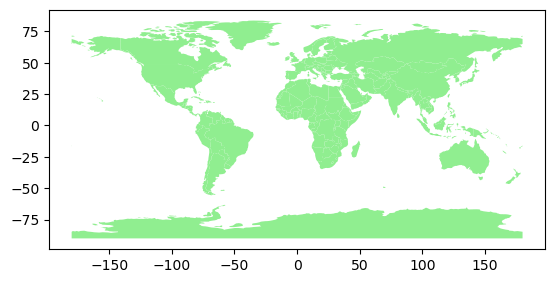

In [26]:
countries.plot(color="lightgreen")
plt.show()

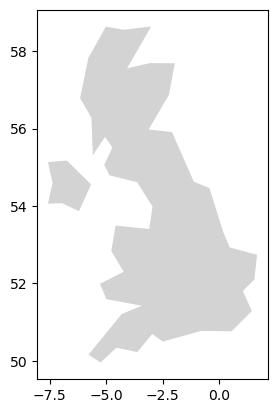

In [27]:
countries[countries["name"] == "United Kingdom"].plot(color="lightgrey")
plt.show()

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_11216/3735747774.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


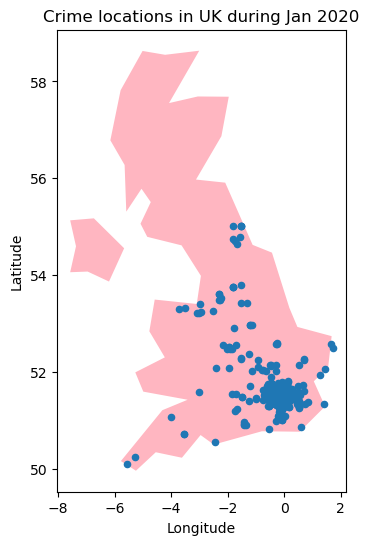

In [28]:
# PLOTTING THE LOCATIONS ON MAP

# Initialize an axis
fig, ax = plt.subplots(figsize=(8, 6))

# Load the map data and plot the United Kingdom
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United Kingdom"].plot(ax=ax, color="lightpink")

# Plot points on the same axis
df.plot(x="Longitude", y="Latitude", kind="scatter", 
        title="Crime locations in UK during Jan 2020", ax=ax)

# Show the plot
plt.show()

# Most of the crimes seems to be focussed in London in Jan 2020

In [29]:
df.head()


,Longitude,Latitude,Location,LSOA_name,Crime_type,Last_outcome_category,month,year
0,-0.539301,50.817200,Highdown Drive,Arun,Other theft,Status update unavailable,1,2020
1,0.137065,51.583672,Police Station,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020
2,0.140035,51.589112,Beansland Grove,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020
3,0.137065,51.583672,Police Station,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020
4,0.141143,51.590873,Furze Farm Close,Barking and Dagenham,Anti-social behaviour,Status update unavailable,1,2020


# UNIVARIATE ANALYSIS

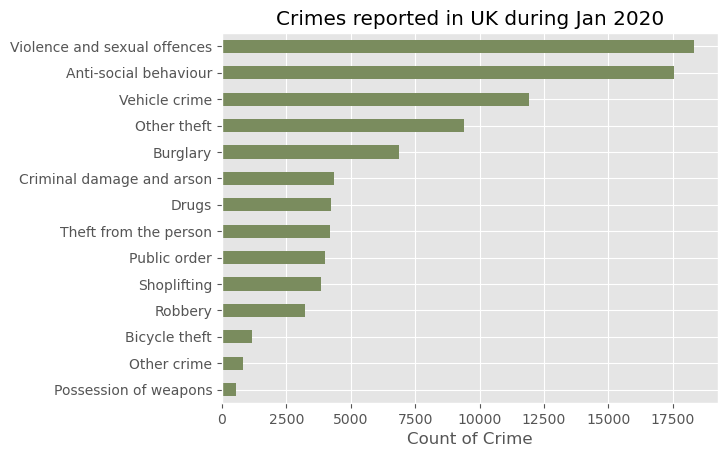

In [42]:
# Types of Crimes committed in Uk during Jan 2020

df['Crime_type'].value_counts().sort_values(ascending = True).plot(kind ="barh", color = '#7a8c5e')
plt.xlabel("Count of Crime")
plt.title("Crimes reported in UK during Jan 2020")
plt.show()

In [51]:
# Location with highest number of crimes is Westminster, Camden ,TowerHamlets, Southwark and Lambeth 

df.groupby("LSOA_name")["Crime_type"].count().sort_values(ascending=False)

LSOA_name
Westminster      7226
Camden           3920
Tower Hamlets    3644
Southwark        3590
Lambeth          3549
                 ... 
Rochford            1
Rotherham           1
Rugby               1
Sandwell            1
Manchester          1
Name: Crime_type, Length: 126, dtype: int64

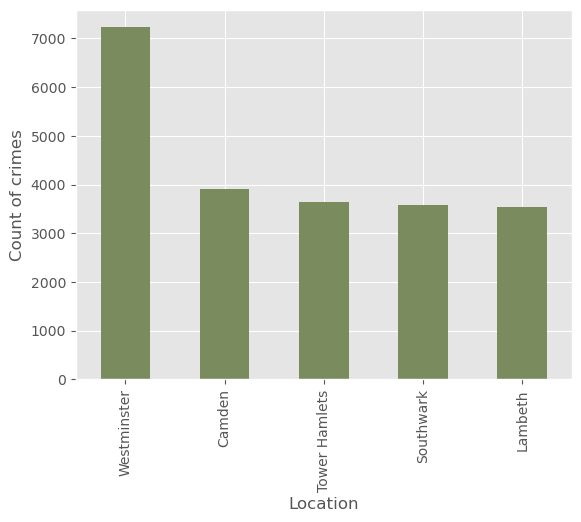

In [56]:
top5_crime_locations = df.groupby("LSOA_name")["Crime_type"].count().sort_values(ascending=False).head()

top5_crime_locations.plot(kind = 'bar', color = '#7a8c5e')
plt.ylabel("Count of crimes")
plt.xlabel("Location")
plt.show()

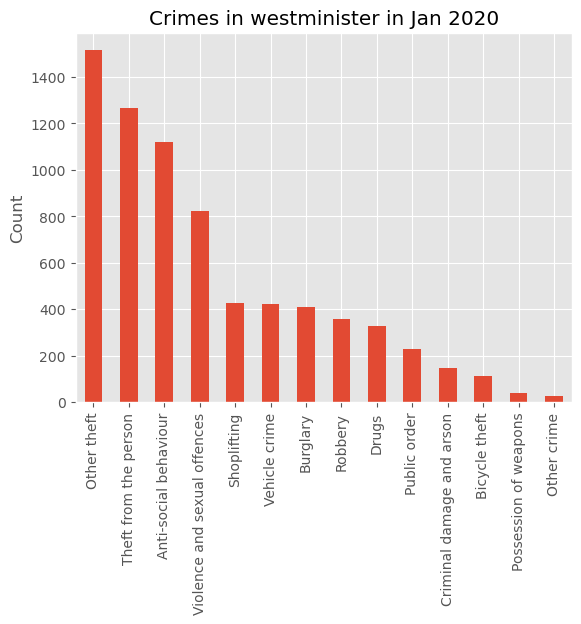

In [79]:
df.query('LSOA_name == "Westminster"')["Crime_type"].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Crimes in westminister in Jan 2020")
plt.show()

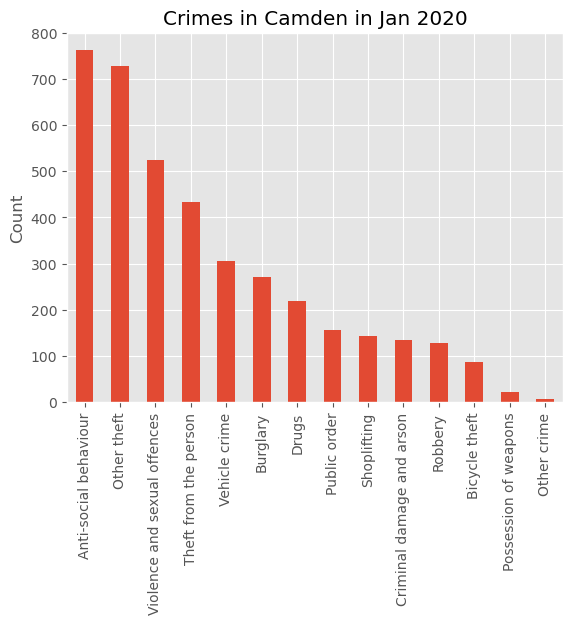

In [81]:
df.query('LSOA_name == "Camden"')["Crime_type"].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Crimes in Camden in Jan 2020")
plt.show()

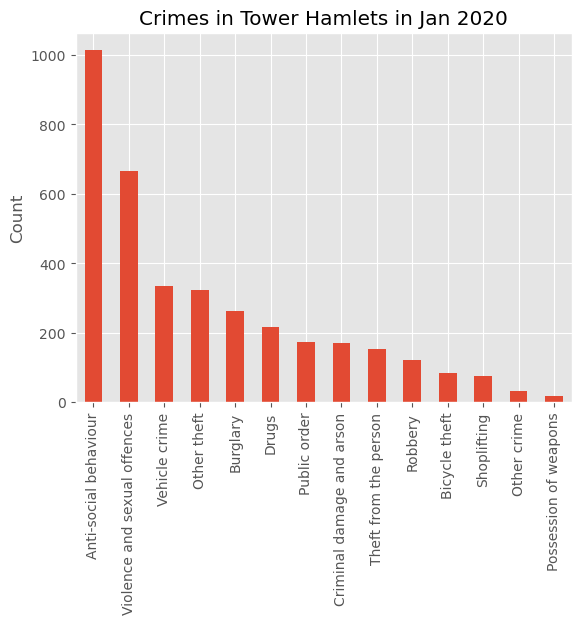

In [83]:
df.query('LSOA_name == "Tower Hamlets"')["Crime_type"].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Crimes in Tower Hamlets in Jan 2020")
plt.show()

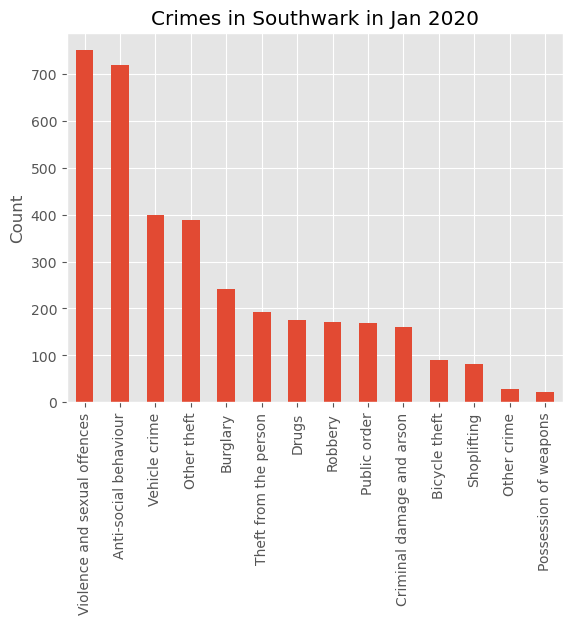

In [84]:
df.query('LSOA_name == "Southwark"')["Crime_type"].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Crimes in Southwark in Jan 2020")
plt.show()

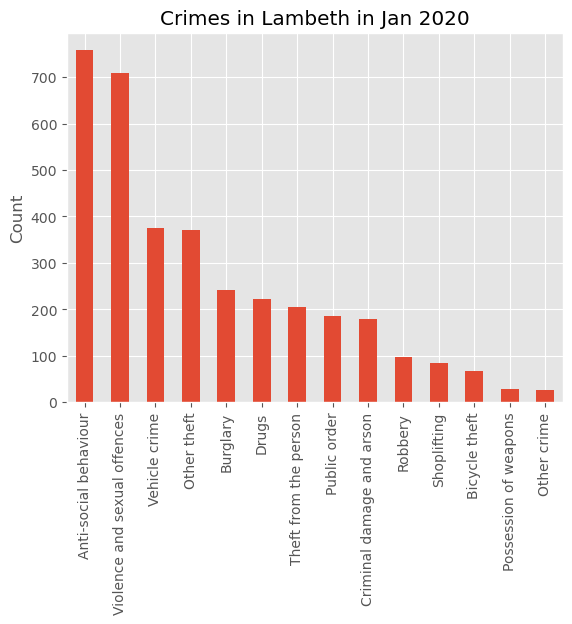

In [85]:
df.query('LSOA_name == "Lambeth"')["Crime_type"].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Crimes in Lambeth in Jan 2020")
plt.show()

# DISTRIBUTION OF CRIME TYPES

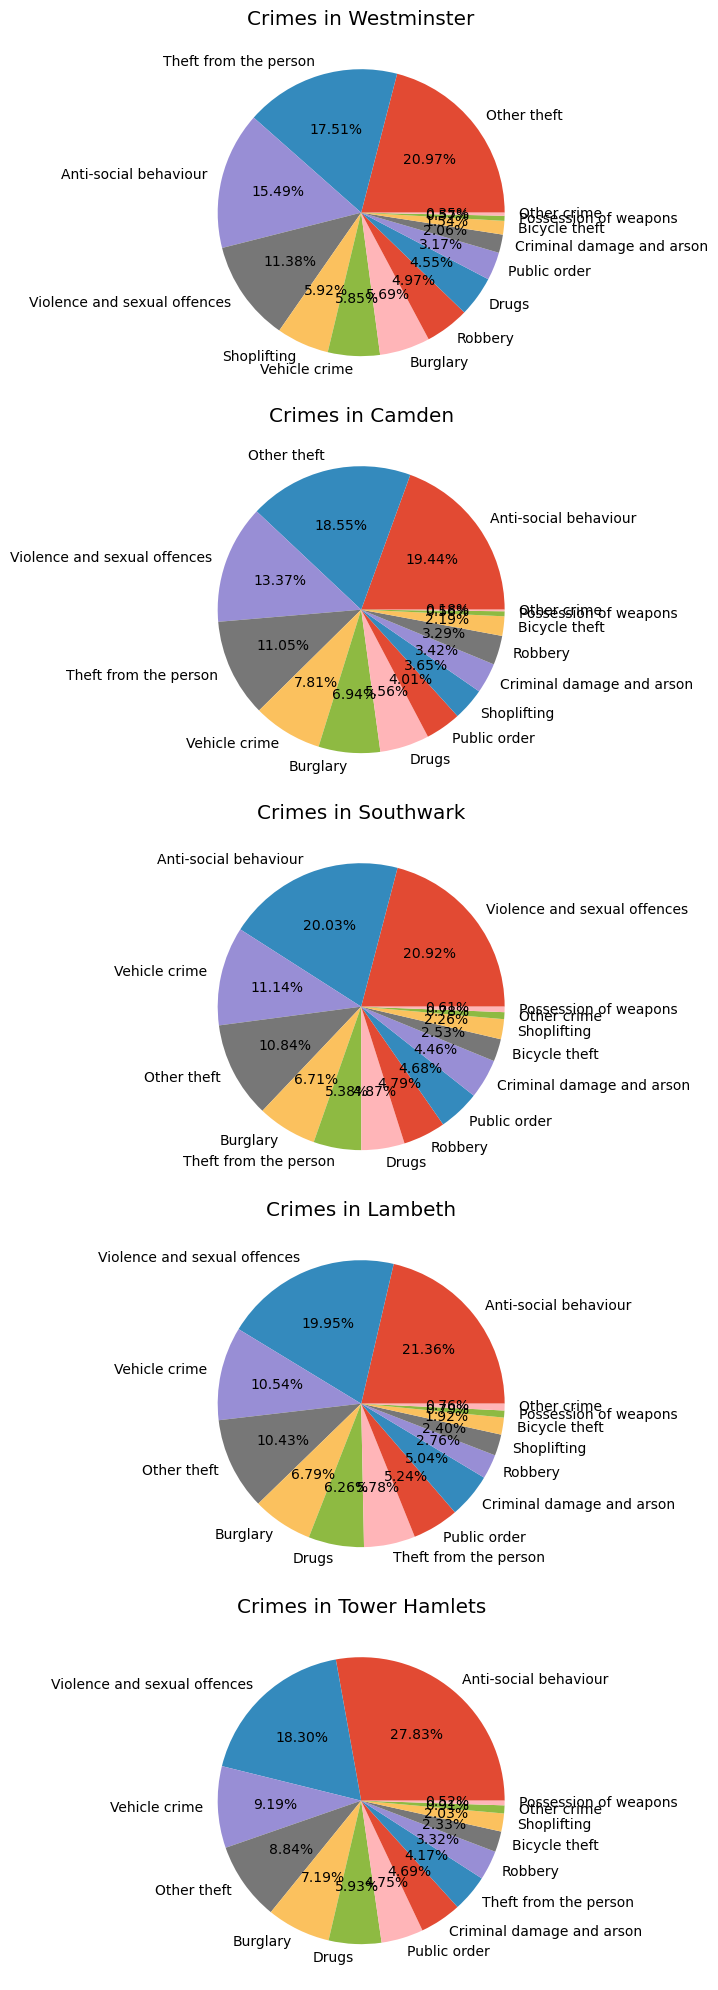

In [99]:
# List of LSOA_name values for which we want to create pie charts
areas = ['Westminster', 'Camden', 'Southwark', 'Lambeth', "Tower Hamlets"]

# Create subplots
fig, axes = plt.subplots(5,1, figsize=(10, 20))

# Loop through each area and create a pie chart
for ax, area in zip(axes, areas):
    df.query(f'LSOA_name == "{area}"')["Crime_type"].value_counts().sort_values(ascending=False).plot(kind='pie', autopct="%.2f%%", ax=ax)
    ax.set_ylabel("")  # Remove y-label
    ax.set_title(f'Crimes in {area}')

plt.tight_layout()
plt.show()

In [101]:
# Here we can create a pivot table, which removes the columns other crime & other theft, as 
# they dont provide any meaningful statistics

df_table = df[~df['Crime_type'].isin(['Other crime', 'Other theft'])] \
.pivot_table(columns = ['Crime_type'], index='LSOA_name', aggfunc= 'count')

df_table_sorted = df_table.sort_values(by=df_table.columns.tolist(), ascending=False)

print("Pivot Table, showing the statistics of each crime in each borough")

display(df_table_sorted.iloc[:10, :])

Pivot Table, showing the statistics of each crime in each borough


Last_outcome_category                         \
Crime_type    Anti-social behaviour Bicycle theft Burglary   
LSOA_name                                                    
Westminster                  1119.0         111.0    411.0   
Tower Hamlets                1014.0          85.0    262.0   
Ealing                        829.0          20.0    251.0   
Camden                        762.0          86.0    272.0   
Lambeth                       758.0          68.0    241.0   
Brent                         737.0          17.0    223.0   
Southwark                     719.0          91.0    241.0   
Newham                        672.0          17.0    190.0   
Haringey                      653.0          25.0    178.0   
Hackney                       652.0          86.0    193.0   

                                                                      \
Crime_type    Criminal damage and arson  Drugs Possession of weapons   
LSOA_name                                                              
Westminster                       149.0  329.0                  41.0   
Tower Hamlets                     171.0  216.0                  19.0   
Ealing                            199.0  155.0                  18.0   
Camden                            134.0  218.0                  22.0   
Lambeth                           179.0  222.0                  28.0   
Brent                             157.0  126.0                  14.0   
Southwark                         160.0  175.0                  22.0   
Newham                            152.0  209.0                  11.0   
Haringey                          114.0  132.0                  14.0   
Hackney                           142.0  144.0                  18.0   

                                                                      ...  \
Crime_type    Public order Robbery Shoplifting Theft from the person  ...   
LSOA_name                                                             ...   
Westminster          229.0   359.0       428.0                1265.0  ...   
Tower Hamlets        173.0   121.0        74.0                 152.0  ...   
Ealing               170.0    83.0       110.0                  52.0  ...   
Camden               157.0   129.0       143.0                 433.0  ...   
Lambeth              186.0    98.0        85.0                 205.0  ...   
Brent                141.0   100.0        94.0                  62.0  ...   
Southwark            168.0   172.0        81.0                 193.0  ...   
Newham               162.0   209.0       179.0                 165.0  ...   
Haringey             106.0   201.0       176.0                 125.0  ...   
Hackney              136.0   166.0        79.0                 252.0  ...   

                  year                                                         \
Crime_type    Burglary Criminal damage and arson  Drugs Possession of weapons   
LSOA_name                                                                       
Westminster      411.0                     149.0  329.0                  41.0   
Tower Hamlets    262.0                     171.0  216.0                  19.0   
Ealing           251.0                     199.0  155.0                  18.0   
Camden           272.0                     134.0  218.0                  22.0   
Lambeth          241.0                     179.0  222.0                  28.0   
Brent            223.0                     157.0  126.0                  14.0   
Southwark        241.0                     160.0  175.0                  22.0   
Newham           190.0                     152.0  209.0                  11.0   
Haringey         178.0                     114.0  132.0                  14.0   
Hackney          193.0                     142.0  144.0                  18.0   

                                                                      \
Crime_type    Public order Robbery Shoplifting Theft from the person   
LSOA_name                                                             

In [109]:
Crime_Outcome= df.groupby('Crime_type')['Last_outcome_category'].value_counts().unstack()

In [112]:
Crime_Outcome

Last_outcome_category,Awaiting court outcome,Court result unavailable,Investigation complete; no suspect identified,Local resolution,Offender given a caution,Offender given a drugs possession warning,Offender given penalty notice,Status update unavailable,Suspect charged as part of another case
Crime_type,,,,,,,,,
Anti-social behaviour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17546.0,NaN
Bicycle theft,10.0,3.0,296.0,1.0,1.0,NaN,NaN,850.0,NaN
Burglary,175.0,61.0,2613.0,NaN,7.0,NaN,NaN,4019.0,NaN
Criminal damage and arson,94.0,102.0,1623.0,57.0,47.0,NaN,2.0,2421.0,NaN
Drugs,360.0,461.0,277.0,2148.0,196.0,28.0,460.0,317.0,NaN
Other crime,42.0,66.0,388.0,47.0,13.0,NaN,NaN,272.0,NaN
Other theft,68.0,24.0,4085.0,35.0,15.0,NaN,NaN,5165.0,NaN
Possession of weapons,94.0,165.0,144.0,13.0,31.0,NaN,NaN,111.0,NaN
Public order,133.0,161.0,2042.0,31.0,28.0,NaN,24.0,1565.0,NaN


This detailed analysis of London’s crime data for January 2020 provides critical insights:

High-Crime Areas: Westminster, Camden, Tower Hamlets, Southwark, and Lambeth require focused crime reduction efforts.
Prevalent Crime Types: Theft and violence are the most common crime types across high-crime areas.
Geographical Concentration: Crimes are heavily concentrated in London, necessitating targeted public safety strategies.
Temporal Insights: Monthly and yearly breakdowns aid in understanding crime trends over time.
Data-Driven Decision Making: The insights enable authorities to allocate resources effectively and design targeted interventions.
Public Awareness: Residents can use this information to make informed decisions about their safety and residential choices.
This comprehensive analysis lays the groundwork for future research and ongoing monitoring to enhance public safety and reduce crime in London.